# Dimensionality Reduction Sprint Challenge

A powerful method for dimensionality reduction is using Principal Components Analysis (PCA).

Students should be able to complete objectives after this sprint:
* Identify the use case for data normalization/standardization
* Graph the top two principal components of a high dimensional dataset with PCA
* Compute the eigenvectors and eigenvalues of a dataset's covariance matrix

Lets use the UCI Wine Dataset for this Sprint  Challenge: It is high dimensional, numeric, and clean - an excellent opportunity for PCA.

[UCI Wine Data Set](http://archive.ics.uci.edu/ml/datasets/Wine)

The UCI License forbids redistributing their data. We can link directly to it!

[UCI Wine Data Set Data](http://archive.ics.uci.edu/ml/machine-learning-databases/wine/)

In [1]:
# Download the data to your colab instance!
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data -O wine.data

--2018-04-20 16:42:58--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [text/plain]
Saving to: ‘wine.data’

wine.data           100%[===================>]  10.53K  --.-KB/s    in 0s      

2018-04-20 16:42:58 (191 MB/s) - ‘wine.data’ saved [10782/10782]



In [0]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('wine.data')

# Column names from:
# http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names
columns = ['vinyard','alcohol','malic acid','ash','ash alcalinity','magnesium',
           'Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
           'Color intensity','Hue','dilute OD280/OD315', 'Proline']

data.columns = columns

vinyard = data['vinyard']
data = data.drop(['vinyard'],axis=1)
colors = np.array(['red','green','blue'])[np.array([vinyard])-1]

# 1. Identify the use case for normalization

Principal Components Analysis will give us a view into our data that maximizes its variance, potentially improving intuition and learning algorithms. Look at the below `data.std()` output. If we use PCA to project the wine dataset onto the 3 dimensions with the highest variance, which ones will they be? How will this projection differ than simply plotting the three dimensions directly?

In [3]:
print(data.std())

alcohol                   0.808808
malic acid                1.119314
ash                       0.275080
ash alcalinity            3.336071
magnesium                14.174018
Total phenols             0.626465
Flavanoids                0.998658
Nonflavanoid phenols      0.124653
Proanthocyanins           0.571545
Color intensity           2.324446
Hue                       0.229135
dilute OD280/OD315        0.705103
Proline                 314.884046
dtype: float64


The bases of the dimensions found by PCA are a mutually orthogonal set of vectors corresponding to the eigenvectors of the eigendecomposition of the data's covariance matrix. The first principal component is then the eigenvector corresponding to the highes eigenvalue.

What this means in relation to the data is that each component can be some linear combination of the existing bases (features). Because simply computing the standard deviation of each feature independently doesn't reveal how the features are dependent or correlated with one another.

However, because some features in the raw data occupy larger scales and thus have higher standard deviations, it is likely that the principal components will be highly correlated with these dimensions. In other words, their basis vectors will point in almost the same direction. Because of this, a projection onto the first three principal components will be very similar to a projection onto the three dimensions of greatest variance.

Despite this, we cannot precisely say "what" the first three principal components will be, other than that they will be orthogonal to each other, will be some linear combination of the 13 features, and in the case of this unstandardized data, will be closely aligned with the three features of highest standard deviation.

# 2. Graph the top two dimensions of a high dimensional dataset using PCA

Use PCA with 2 components to plot the top two dimensions of this dataset. Apply the color vector above so that the origin of each sample is visible.

In [0]:
# Use PCA and make a graph of data

from sklearn.decomposition import PCA

model1 = PCA(n_components=2)
model1.fit(data)
data_pca = model1.transform(data)

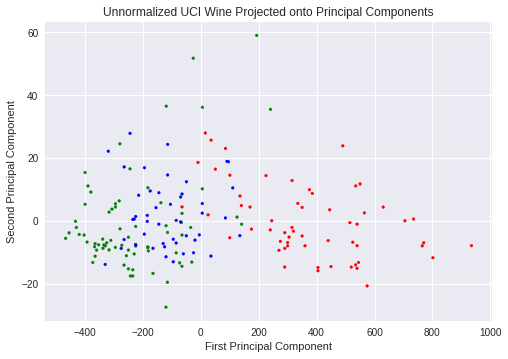

In [5]:
plt.scatter(*data_pca.T, s=8, c=colors.reshape(-1))
plt.title('Unnormalized UCI Wine Projected onto Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component');

# 3. Graph the top two dimensions of a normalized high dimensional dataset using PCA

Use a `normalization` from `scikit.preprocessing` to improve the results of the PCA.

First, some disambiguation. "Normalization" is a term used in many contexts, with often similar yet distinct meanings. In the context of vectors, it typically means to scale them so that they have unit norm. This is the definition used by [`sklearn.preprocessing.Normalize`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). When called on a matrix, it is assumed that the it is of shape `(n_samples, n_features)`, where each sample is a vector. Each row of the matrix is the normalized.

In the context of probability distributions, mathematicians typically use "normalized" to refer to functions that integrate over their entire domain to one - in other words, they have unit area under the curve.

A third definition of normalization, one which is most relevant to data science, is treating data as a collection of random variables (1 for each feature), hypothesizing that each is from an independent normal (Gaussian) distribution, and centering each around the mean and giving it unit variance. This is also referred to as "standardization", and is implemented by [`sklearn.preprocessing.StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

For the purposes of preprocessing before PCA, standardization is the most appropriate. Normalizing by rescaling each sample to have unit norm will coerce the data to occupy a unit hypersphere in the dimension of the number of features. This transformation from a space to a hypersurface in that space discards information. As much as possible, we would like to preprocessing step to preserve information, and only compress during the dimensionality reduction step itself - PCA.

Using `StandardScalar` will improve the results of PCA because it is not the case that the features of the data are independent, or normal. The principal components will be some linear combination of features, and will leverage the dependence between features of data to find the combination along which the variance is greatest. Furthermore, even if two features of data both came from normal distributions, and one had a larger variance than the other to begin with, rescaling both to one is only harmful if there was a meaningful relationship between the units of one feature and the units of another. This tends to be the exception, rather than the rule (for example, if one column records mass, and another length, and because of the choice of units one column occupies a wider scale than the other, rescaling them both indepently to unit variance is the correct choice).

In [0]:
import sklearn.preprocessing as preprocessing

# Use normalization, and PCA, to make a graph of the data

data_processed = preprocessing.StandardScaler().fit_transform(data)

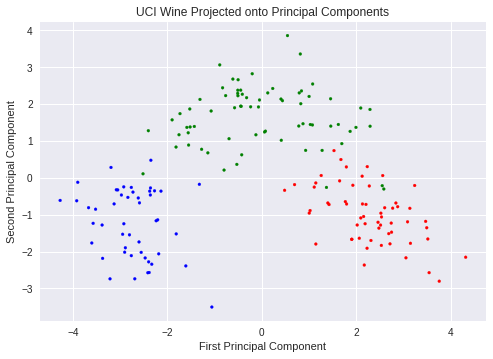

In [7]:
model2 = PCA(n_components=2)
model2.fit(data_processed)
data_pca = model2.transform(data_processed)

plt.scatter(*data_pca.T, s=8, c=colors.reshape(-1))
plt.title('UCI Wine Projected onto Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component');

As expected, the projected data is much more separable is the space with the first 2 principal components as bases.

# 4. Compute the eigenvectors of a dataset

What are the top-two eigenvectors of the above un-normalized dataset?

In [8]:
# evec = the top two eigenvectors of the UCI Wine dataset, un-normalized

evec = model1.components_
print('Basis of 1st Principal Component: {}\nBasis of 2nd Principal Component: {}'.format(evec[0], evec[1]))

Basis of 1st Principal Component: [ 1.64640308e-03 -6.73503229e-04  1.94877262e-04 -4.62714440e-03
  1.74715429e-02  9.86349949e-04  1.55753482e-03 -1.22303077e-04
  5.91285826e-04  2.33005971e-03  1.70867398e-04  6.85045272e-04
  9.99830206e-01]
Basis of 2nd Principal Component: [ 7.16631916e-04  2.50017789e-03  4.67090151e-03  2.87250643e-02
  9.99280105e-01  7.48473242e-04 -4.49114755e-04 -1.34284344e-03
  4.71110804e-03  1.54838007e-02 -7.97923308e-04 -4.34277343e-03
 -1.73653604e-02]


As expected, the first principal component is very nearly in the direction of the 13th feature of the unnormalized data, `"Proline"`. The second component is also nearly in the direction of the 5th feature, `"Magnesium"`.

This can be observed simply by inspecting each element of the vectors and noting that for both, one element is orders of magnitude greater than all other elements.

In [9]:
evec = model2.components_
print('Basis of 1st Principal Component: {}\nBasis of 2nd Principal Component: {}'.format(evec[0], evec[1]))

Basis of 1st Principal Component: [ 0.13788809 -0.24638109 -0.0043183  -0.23737955  0.1350017   0.39586939
  0.42439422 -0.29913568  0.31280321 -0.09328558  0.29956536  0.37720252
  0.28428101]
Basis of 2nd Principal Component: [-0.48583464 -0.22157478 -0.31528188  0.01214349 -0.30028828 -0.07054905
 -0.00173207 -0.02466918 -0.04144561 -0.52801878  0.27405069  0.16544914
 -0.3695384 ]


# 5. Compute the eigenvalues of a dataset

What are the top-two eigenvalues of the above un-normalized dataset?

In [10]:
# egval = the top two eigenvalues of the UCI Wine dataset, un-normalized

egval = model1.explained_variance_

print(egval)

[99185.58985563   170.86188421]


This can be interpreted as meaning that in the unnormalized dataset, almost all of the variance can be explained by the first principal component, which itself is very nearly the original feature with the greatest standard deviation.

This reinforces the idea that standardizing the data allows PCA to provide more insightful and intuition-generating results.

In [11]:
egval2 = model2.explained_variance_

print(egval2)

[4.7043776  2.51557865]
